# Employee DB SF Salaries Exercise



# **Load Necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ** Read Salaries.csv as a dataframe called sal.**

In [4]:
sal=pd.read_csv('Salaries.csv')

# ** Check the head of the DataFrame. **

In [6]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [8]:
# Check nan values
sal.isnull().sum()


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [11]:
#total reords , rows and columns
#sal.shape
print('Total no. of rows',sal.shape[0])
print('Total no. of column',sal.shape[1])

Total no. of rows 148654
Total no. of column 13


In [10]:
#check feature names
sal.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [14]:
#drop Notes and Status columns
sal.drop(['Notes','Status'],axis=1,inplace=True)

In [15]:
#check new shape
sal.shape

(148654, 11)

In [16]:
#check columns
sal.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [26]:
#fill BasePay NaN by using some technique
#sal['BasePay'].isna().sum()
#sal['BasePay'].mean()-->66325

sal.BasePay.fillna(66325,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14580\2190196109.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sal.BasePay.fillna(66325,inplace=True)


# **What is the average BasePay ?**

In [30]:
round(sal.BasePay.mean())

66325

# ** What is the highest amount of OvertimePay in the dataset ? **

In [35]:
sal.OvertimePay.max()

245131.88

## Fetch record of Highest paid employee

In [38]:
sal.query('TotalPay==TotalPay.max()')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco


## Fetch name of highest Overtime pay employee


In [42]:
sal.query('OvertimePay==OvertimePay.max()')['EmployeeName']

1    GARY JIMENEZ
Name: EmployeeName, dtype: object

# ** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [48]:
sal.query("EmployeeName=='JOSEPH DRISCOLL'")['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

**fetch entries of all Joseph Discroll**

In [54]:
#sal.EmployeeName.str.lower()
sal.query("EmployeeName.str.lower()=='joseph driscoll'")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
24,25,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION",140546.86,97868.77,31909.28,NaN,270324.91,270324.91,2011,San Francisco
36198,36199,Joseph Driscoll,"Captain, Fire Suppression",145658.98,114513.29,28743.36,42919.16,288915.63,331834.79,2012,San Francisco


# ** How much does JOSEPH DRISCOLL make (including benefits)? **

In [55]:
sal.query("EmployeeName=='JOSEPH DRISCOLL'")['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

# ** What is the name, Job title of highest paid person (including benefits)?**

In [59]:
sal.query('TotalPayBenefits == TotalPayBenefits.max()')[['EmployeeName','JobTitle']]

,EmployeeName,JobTitle
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


# ** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [5]:
sal.query('TotalPayBenefits==TotalPayBenefits.min()')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


## Show me the records with totalpaybenefit less than or equal to 0


In [6]:
sal.query('TotalPayBenefits<=0')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.00,NaN,0.00,0.00,2011,NaN,San Francisco,NaN
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.00,NaN,0.00,0.00,2011,NaN,San Francisco,NaN
36158,36159,JOSEPHINE MCCREARY,MANAGER IV,0.0,0.0,0.00,NaN,0.00,0.00,2011,NaN,San Francisco,NaN
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.00,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.00,-8.20,0.00,-8.20,2013,NaN,San Francisco,NaN
110530,110531,David P Kucia,Police Officer 3,NaN,0.0,0.00,-33.89,0.00,-33.89,2013,NaN,San Francisco,NaN
148626,148627,Paulet Gaines,Account Clerk,0.0,0.0,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,NaN
148627,148628,Brett A Lundberg,General Laborer,0.0,0.0,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,NaN
148628,148629,Mark W Mcclure,General Laborer,0.0,0.0,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,NaN
148629,148630,Elizabeth Iniguez,Transcriber Typist,0.0,0.0,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,NaN


# ** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [55]:
# Yearwise Average BasePay
sal.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

# ** How many unique job titles are there? **

In [24]:
#sal.JobTitle.unique()
sal.JobTitle.nunique()

2159

# ** What are the top 5 most common jobs? **

In [56]:
sal['JobTitle'].value_counts().head()

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64

In [57]:
# last five
sal['JobTitle'].value_counts().tail()

JobTitle
CHIEF HOUSING INSPECTOR                           1
TRAFFIC SIGNAL OPERATOR                           1
COURT COMPUTER FACILITIES COORDINATOR             1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I    1
VICTIM & WITNESS TECHNICIAN                       1
Name: count, dtype: int64

# How many are there those work as a POLICE OFFICER III

In [58]:
#sal.query("JobTitle=='Police Officer 3'")
sal.query("JobTitle=='POLICE OFFICER III'").shape[0]

779

# In which department we have least employees?

In [61]:
#sal['JobTitle'].min()
sal.groupby('JobTitle')['Id'].count().sort_values(ascending=True).head()

JobTitle
ZOO CURATOR                               1
DIRECTOR, INFORMATION TECHNOLOGY GROUP    1
DIRECTOR, HUMAN RESOURCES                 1
DIRECTOR, FISCAL SERVICES                 1
DIRECTOR, EMPLOYEE RELATIONS DIVISION     1
Name: Id, dtype: int64

# Fetch record of year 2011 where Basepay 200000

In [62]:
sal.query('Year==2011' and 'BasePay==200000')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


# How much average basepay is given to employees inthe year 2013

In [64]:
sal.query('Year==2013')['BasePay'].mean()

69630.03021648065

# Plot.the % distribustion of Yearwise TotalPay

<Axes: ylabel='count'>

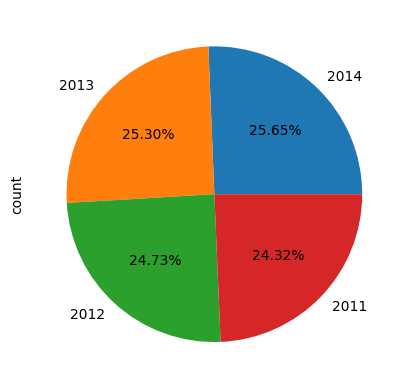

In [72]:
sal['Year'].value_counts().plot(kind='pie',autopct='%.2f%%')

# How many employees getting 0 overtimePay?

In [70]:
sal.query('OvertimePay==0').value_counts('Id').sum()

77321

## Load data from Github